In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [2]:
df = pd.read_csv('data/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,premium
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
premium     0
dtype: int64

In [5]:
cat_feat = []
for feature in df.columns:
    if df[feature].dtype == 'O':
        cat_feat.append(feature)
        print(feature, df[feature].unique())

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


In [6]:
cat_feat

['sex', 'smoker', 'region']

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lb = LabelEncoder()

In [9]:
for feature in cat_feat:
    df[feature] = lb.fit_transform(df[feature])

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,premium
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


C:\Users\roath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


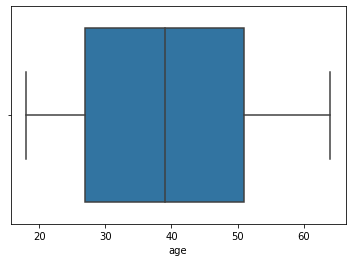

C:\Users\roath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


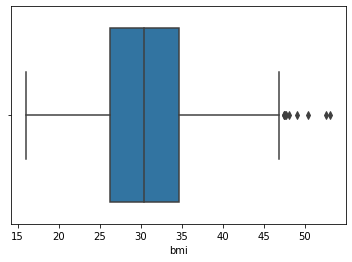

In [11]:
for feature in ['age', 'bmi']:
    sns.boxplot(df[feature])
    plt.show()

In [12]:
import statistics as stats

In [13]:
data = df.copy()

In [14]:
data.sort_values(by='bmi', inplace=True)

In [15]:
data.reset_index(inplace=True)

In [16]:
data.drop(['index'],axis=1, inplace=True)

In [17]:
data

,age,sex,bmi,children,smoker,region,premium
0,18,1,16.0,0,0,0,1694.80
1,21,0,16.8,1,0,0,3167.46
2,38,1,16.8,2,0,0,6640.54
3,26,0,17.2,2,1,0,14455.64
4,18,1,17.3,2,1,0,12829.46
...,...,...,...,...,...,...,...
1333,46,0,48.1,2,0,0,9432.93
1334,58,1,49.1,0,0,2,11381.33
1335,23,1,50.4,1,0,2,2438.06
1336,22,1,52.6,1,1,2,44501.40


In [18]:
q1 = np.percentile(data['bmi'], 25)
q3 = np.percentile(data['bmi'], 75)
print(q1, q3)

26.3 34.7


In [19]:
IQR = q3-q1
IQR

8.400000000000002

In [20]:
lb = q1 - 1.5*IQR
ub = q3 + 1.5*IQR

In [21]:
lb, ub

(13.699999999999998, 47.300000000000004)

In [22]:
for i in range(len(data['bmi'])):
    if data['bmi'][i]>ub or data['bmi'][i]<lb:
        data.drop(index=i, axis=0, inplace=True)

In [23]:
data.shape

(1329, 7)

In [24]:
df.shape

(1338, 7)

In [25]:
data['bmi'][0]

16.0

C:\Users\roath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


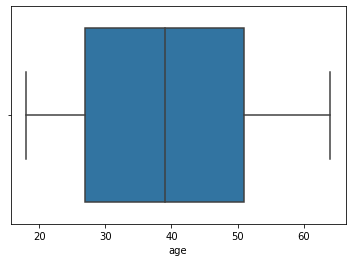

C:\Users\roath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


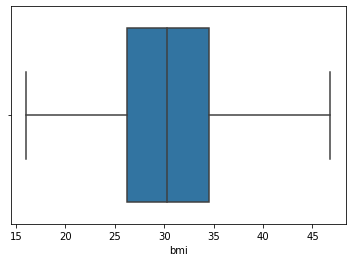

In [26]:
for feature in ['age', 'bmi']:
    sns.boxplot(data[feature])
    plt.show()

In [27]:
df = data

In [29]:
from sklearn.preprocessing import StandardScaler

In [31]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [30]:
scaler = StandardScaler()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
scaling_features = ['age', 'bmi']

In [36]:
X_train[scaling_features] = scaler.fit_transform(X_train[scaling_features])

C:\Users\roath\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [37]:
X_train

,age,sex,bmi,children,smoker,region
405,0.910071,1,-0.509855,0,1,1
945,-0.797603,1,0.551325,0,0,1
1318,0.554306,0,2.458134,1,0,2
306,-0.797603,0,-0.775150,0,0,3
3,-0.939910,0,-2.201112,2,1,0
...,...,...,...,...,...,...
133,1.052377,0,-1.239417,3,0,3
116,-0.228379,0,-1.305741,2,1,3
538,-1.437981,0,-0.261141,0,0,3
17,0.910071,0,-2.018721,0,0,1


In [38]:
X_test[scaling_features] = scaler.transform(X_test[scaling_features])

C:\Users\roath\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [39]:
X_test

,age,sex,bmi,children,smoker,region
1080,1.479296,0,0.916106,0,0,0
345,0.910071,1,-0.675665,3,0,2
932,0.411999,1,0.534744,1,0,3
57,-1.437981,0,-1.637360,0,0,3
1161,-1.437981,0,1.148239,0,0,1
...,...,...,...,...,...,...
262,-0.370685,1,-0.858055,2,1,2
1031,-1.437981,0,0.783459,0,0,1
1325,-0.157225,1,2.657106,3,0,2
1226,0.340846,1,1.496439,0,0,1
